# Unit 5 - Financial Planning

In [12]:
!pip install python-dotenv
!pip install alpaca-trade-api
!pip install yfinance

     ---------------------------------------- 0.0/60.3 kB ? eta -:--:--
     ---------------------------------------- 60.3/60.3 kB ? eta 0:00:00
     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     ---------------------------------------- 112.2/112.2 kB ? eta 0:00:00


In [13]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import yfinance as yf
from MCForecastTools import MCSimulation

%matplotlib inline

In [10]:
# Load .env enviroment variables
load_dotenv()

False

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [14]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [15]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [16]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url)
btc_data = response_btc_data.json()

# Fetch current ETH price
response_eth_data = requests.get(eth_url)
eth_data = response_eth_data.json()

# Compute current value of my crpto
# Assign CAD price
btc_cad_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
eth_cad_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Calculate crypto currency value
my_btc_value = btc_cad_price * my_btc
my_eth_value = eth_cad_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45627.67
The current value of your 5.3 ETH is $13129.58


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [21]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [22]:
import datetime as dt

# Set the tickers
agg_ticker = "AGG"
spy_ticker = "SPY"

# Get current closing prices for SPY and AGG
Start = dt.datetime(2021, 12, 20)
End = dt.datetime(2022, 12, 19)

# This function fetch ticker data and return hisorical ticker data as dataframe
def get_ticker_data(ticker, start, end):
    ticker_df = pd.DataFrame(yf.Ticker(ticker).history(start=Start,end=End))
    return ticker_df

# Fetch ticker data and assign to dataframe
agg_ticker_df = get_ticker_data(agg_ticker, Start, End)

spy_ticker_df = get_ticker_data(spy_ticker, Start, End)

# Reorganize the DataFrame
# Rename column name
agg_ticker_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
spy_ticker_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

# Concatenate the ticker DataFrames
crypto_df = pd.concat([agg_ticker_df,spy_ticker_df], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
crypto_df.head()

AGG                                      \
                                 open        high         low       close   
Date                                                                        
2021-12-20 00:00:00-05:00  111.165162  111.203974  110.922592  110.932297   
2021-12-21 00:00:00-05:00  110.680032  110.922603  110.583006  110.844978   
2021-12-22 00:00:00-05:00  110.932296  110.951699  110.777048  110.941994   
2021-12-23 00:00:00-05:00  110.893497  110.912899  110.680034  110.806168   
2021-12-27 00:00:00-05:00  110.757648  110.903192  110.738239  110.864380   

                                                                          \
                             volume Dividends Stock Splits Capital Gains   
Date                                                                       
2021-12-20 00:00:00-05:00   7382600       0.0          0.0           0.0   
2021-12-21 00:00:00-05:00  12970200       0.0          0.0           0.0   
2021-12-22 00:00:00-05:00   6171700       0.0          0.0           0.0   
2021-12-23 00:00:00-05:00   5506700       0.0          0.0           0.0   
2021-12-27 00:00:00-05:00   5436800       0.0          0.0           0.0   

                                  SPY                                      \
                                 open        high         low       close   
Date                                                                        
2021-12-20 00:00:00-05:00  445.524196  446.426050  442.250016  446.014343   
2021-12-21 00:00:00-05:00  449.572798  454.082158  447.318132  453.935120   
2021-12-22 00:00:00-05:00  453.670471  458.591538  453.464587  458.473907   
2021-12-23 00:00:00-05:00  459.512957  462.885172  459.405139  461.326508   
2021-12-27 00:00:00-05:00  462.757743  467.904288  462.708740  467.855286   

                                                                           
                              volume Dividends Stock Splits Capital Gains  
Date                                                                       
2021-12-20 00:00:00-05:00  107134800       0.0          0.0           0.0  
2021-12-21 00:00:00-05:00   69806300       0.0          0.0           0.0  
2021-12-22 00:00:00-05:00   58890200       0.0          0.0           0.0  
2021-12-23 00:00:00-05:00   56439700       0.0          0.0           0.0  
2021-12-27 00:00:00-05:00   56808600       0.0          0.0           0.0

In [23]:
# Pick AGG and SPY close prices
agg_close_price = crypto_df.iloc[0,3]
spy_close_price = crypto_df.iloc[0,10]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${round(agg_close_price,2)}")
print(f"Current SPY closing price: ${round(spy_close_price,2)}")

Current AGG closing price: $110.93
Current SPY closing price: $442.25


In [24]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22112.50
The current value of your 200 AGG shares is $22186.46


### Savings Health Analysis

In [25]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_cryptos = my_btc_value + my_eth_value

my_stocks = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame([my_cryptos,my_stocks], columns=["amount"])

# Set index
index = pd.Index(["crypto","shares"])
df_savings = df_savings.set_index(index)

# Display savings DataFrame
display(df_savings)

,amount
crypto,58757.246977
shares,44298.960174


<Axes: title={'center': 'Saving Portfolio Composition'}, ylabel='amount'>

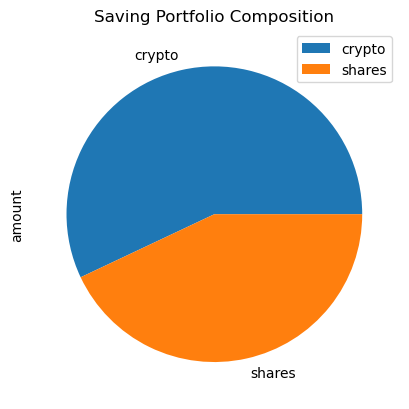

In [26]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Saving Portfolio Composition")

In [27]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
current_savings = df_savings.loc["crypto","amount"] + df_savings.loc["shares","amount"]

# Validate saving health
if current_savings > emergency_fund:
    print(f"Congraturations! your current savings are ${round(current_savings, 2)}, it is ${round((current_savings - emergency_fund),2)} above the emergency fund")
elif current_savings == emergency_fund:
    print(f"Congraturations! your current savings are ${round(current_savings, 2)}, which is exactly the same as the emergency fund")
else:
    print(f"Currently, you are ${round((emergency_fund - current_savings),2)} away from the emergency fund, keep on saving!!")

Congraturations! your current savings are $103056.21, it is $67056.21 above the emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
# Get current closing prices for SPY and AGG
# Set start and end dates of five years back from today.
Start = dt.datetime(2017, 12, 20)
End = dt.datetime(2022, 12, 19)

# This function fetch ticker data and return hisorical ticker data as dataframe
def get_ticker_data(ticker, start, end):
    ticker_df = pd.DataFrame(yf.Ticker(ticker).history(start=Start,end=End))
    return ticker_df

# Fetch ticker data and assign to dataframe
agg_ticker_history_df = get_ticker_data(agg_ticker, Start, End)

spy_ticker_history_df = get_ticker_data(spy_ticker, Start, End)

# Reorganize the DataFrame
# Rename column name
agg_ticker_history_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
spy_ticker_history_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

# Drop unnecessary columns
agg_ticker_history_df = agg_ticker_history_df.drop(axis=1, columns=["Dividends", "Stock Splits"])
spy_ticker_history_df = spy_ticker_history_df.drop(axis=1, columns=["Dividends", "Stock Splits"])

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_ticker_history_df,spy_ticker_history_df], axis=1, keys=["AGG","SPY"])

df_stock_data.head()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2017-12-20 00:00:00-05:00  95.796663  95.911176  95.761426  95.805473   
2017-12-21 00:00:00-05:00  95.837184  95.934115  95.810750  95.890053   
2017-12-22 00:00:00-05:00  95.890089  95.951771  95.881275  95.934151   
2017-12-26 00:00:00-05:00  95.969388  96.057505  95.934140  96.013443   
2017-12-27 00:00:00-05:00  96.066305  96.339476  96.066305  96.313042   

                                                         SPY              \
                            volume Capital Gains        open        high   
Date                                                                       
2017-12-20 00:00:00-05:00  4002500           0.0  245.371101  245.425978   
2017-12-21 00:00:00-05:00  2374500           0.0  244.886397  245.480937   
2017-12-22 00:00:00-05:00  3292800           0.0  244.758325  244.794918   
2017-12-26 00:00:00-05:00  1873400           0.0  244.255237  244.611961   
2017-12-27 00:00:00-05:00  2046900           0.0  244.557089  244.877219   

                                                                           
                                  low       close    volume Capital Gains  
Date                                                                       
2017-12-20 00:00:00-05:00  243.925979  244.236954  76751500           0.0  
2017-12-21 00:00:00-05:00  244.483952  244.740051  67032300           0.0  
2017-12-22 00:00:00-05:00  244.118064  244.676010  78720900           0.0  
2017-12-26 00:00:00-05:00  244.108919  244.383301  45244400           0.0  
2017-12-27 00:00:00-05:00  244.218676  244.502213  57751000           0.0

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist_thirty = MCSimulation(portfolio_data=df_stock_data, weights = [.4,.6],num_simulation = 500, num_trading_days = 252*30)

In [30]:
# Printing the simulation input data
MC_dist_thirty.portfolio_data.head()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2017-12-20 00:00:00-05:00  95.796663  95.911176  95.761426  95.805473   
2017-12-21 00:00:00-05:00  95.837184  95.934115  95.810750  95.890053   
2017-12-22 00:00:00-05:00  95.890089  95.951771  95.881275  95.934151   
2017-12-26 00:00:00-05:00  95.969388  96.057505  95.934140  96.013443   
2017-12-27 00:00:00-05:00  96.066305  96.339476  96.066305  96.313042   

                                                                      SPY  \
                            volume Capital Gains daily_return        open   
Date                                                                        
2017-12-20 00:00:00-05:00  4002500           0.0          NaN  245.371101   
2017-12-21 00:00:00-05:00  2374500           0.0     0.000883  244.886397   
2017-12-22 00:00:00-05:00  3292800           0.0     0.000460  244.758325   
2017-12-26 00:00:00-05:00  1873400           0.0     0.000827  244.255237   
2017-12-27 00:00:00-05:00  2046900           0.0     0.003120  244.557089   

                                                                         \
                                 high         low       close    volume   
Date                                                                      
2017-12-20 00:00:00-05:00  245.425978  243.925979  244.236954  76751500   
2017-12-21 00:00:00-05:00  245.480937  244.483952  244.740051  67032300   
2017-12-22 00:00:00-05:00  244.794918  244.118064  244.676010  78720900   
2017-12-26 00:00:00-05:00  244.611961  244.108919  244.383301  45244400   
2017-12-27 00:00:00-05:00  244.877219  244.218676  244.502213  57751000   

                                                      
                          Capital Gains daily_return  
Date                                                  
2017-12-20 00:00:00-05:00           0.0          NaN  
2017-12-21 00:00:00-05:00           0.0     0.002060  
2017-12-22 00:00:00-05:00           0.0    -0.000262  
2017-12-26 00:00:00-05:00           0.0    -0.001196  
2017-12-27 00:00:00-05:00           0.0     0.000487

In [32]:
from warnings import simplefilter

# Running a Monte Carlo simulation to forecast 30 years cumulative returns
simplefilter(action="ignore", category=pd.errors.PerformanceWarning) # This function ignores warning message

MC_dist_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993733,0.995163,1.003204,1.013004,1.020837,0.990697,1.005523,0.999050,0.994093,1.001144,...,1.004169,1.006550,1.004361,0.995117,1.001150,1.013613,1.012629,0.995517,1.003970,1.002579
2,1.005391,1.005198,1.004194,1.011503,1.030283,0.989921,1.009718,0.994546,0.996233,0.995612,...,0.994579,1.010168,1.005076,1.012571,1.002686,1.004013,1.006998,0.996948,0.996798,1.005533
3,1.008267,1.010782,1.000994,1.017586,1.012729,0.998059,1.019362,1.000651,1.000213,1.002451,...,0.992014,1.010465,1.006100,1.015678,1.003020,1.009104,1.005792,1.007082,1.008864,1.001299
4,1.016255,1.015040,0.983770,1.007030,1.011027,0.985873,1.014996,1.007574,0.994368,1.008129,...,0.992329,1.016842,1.014648,1.022582,1.009035,1.011411,1.020013,1.011401,1.003472,1.003629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.606605,7.355030,3.285278,5.322014,7.776396,5.613719,15.831409,14.677144,3.326372,30.192341,...,4.529876,15.162511,7.366761,3.636631,1.643961,9.830919,10.312389,3.811480,15.881164,15.126602
7557,5.649897,7.338892,3.289142,5.373640,7.819110,5.634072,15.808226,14.551595,3.338526,30.007175,...,4.574696,15.377251,7.318526,3.637891,1.643678,9.958900,10.367711,3.811656,16.014536,15.044027
7558,5.676079,7.381505,3.275187,5.347573,7.842093,5.665907,15.582821,14.658036,3.357210,30.262227,...,4.605839,15.477200,7.337930,3.657611,1.625042,10.071831,10.513045,3.823177,16.050455,15.170285
7559,5.717563,7.505307,3.295491,5.399123,7.844777,5.681085,15.356330,14.591262,3.361380,30.267981,...,4.635107,15.354761,7.321905,3.715503,1.613350,10.032894,10.453833,3.857244,16.157728,15.169714


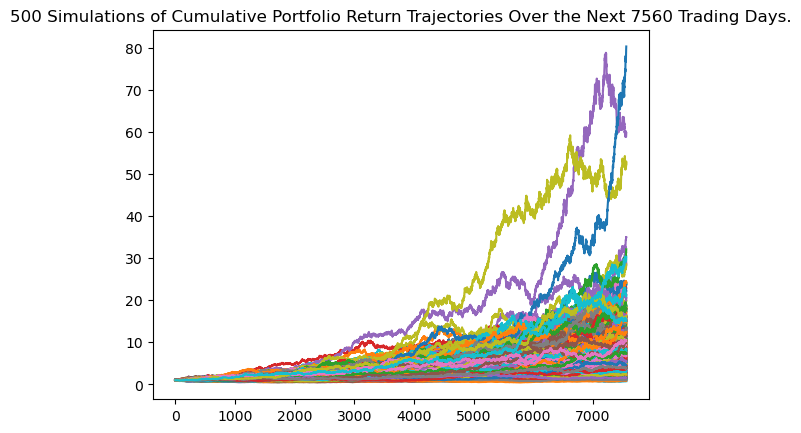

In [33]:
# Plot simulation outcomes
line_plot = MC_dist_thirty.plot_simulation()

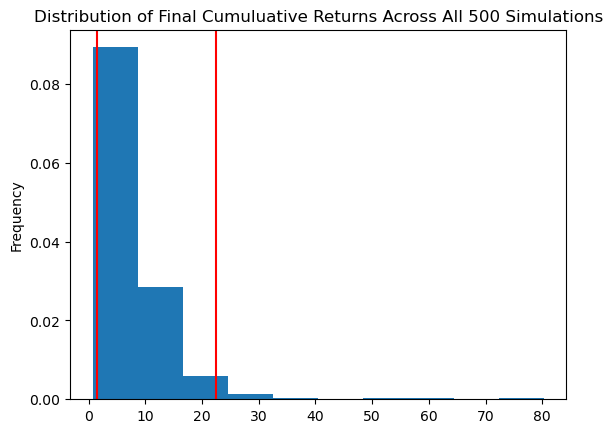

In [34]:
# Plot probability distribution and confidence intervals
dist_plot=MC_dist_thirty.plot_distribution()

### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stat = MC_dist_thirty.summarize_cumulative_return()

# Print summary statistics
print(summary_stat)

count           500.000000
mean              7.770556
std               6.896829
min               0.751089
25%               3.770828
50%               6.179414
75%               9.613942
max              80.257796
95% CI Lower      1.535916
95% CI Upper     22.490632
Name: 7560, dtype: float64


C:\Users\arun1\Bootcamp\Module 5 Challenge\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stat[8]*initial_investment,2)
ci_upper = round(summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $30718.31 and $449812.63


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [37]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stat[8]*initial_investment,2)
ci_upper = round(summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $46077.47 and $674718.95


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Case 1: Increase stock ratio from 60% to 80%, and increase initial_investment to $60,000
MC_dist_portfolio_five = MCSimulation(portfolio_data=df_stock_data, weights = [.2,.8],num_simulation = 500, num_trading_days = 252*5)

In [39]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_portfolio_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993050,0.993817,1.004377,1.002439,1.020733,1.006140,0.998565,1.002641,1.013266,0.997573,...,1.002288,0.986783,0.984535,1.011463,0.988785,0.991104,1.013083,1.005017,1.006136,1.007319
2,0.988203,0.994060,1.016726,0.994600,1.029477,1.032220,1.001577,1.010823,1.000876,1.021823,...,0.978541,0.983708,0.981802,1.002669,0.983299,0.986055,1.027213,1.005909,1.000609,1.015133
3,0.976551,1.005894,1.021433,0.999329,1.046885,1.030575,0.986643,0.998895,1.007586,1.034049,...,0.981102,0.978388,0.977378,1.000512,0.963699,0.983750,1.031403,1.021685,0.996777,1.017514
4,0.969581,1.018657,1.018397,0.994280,1.042058,1.034076,1.000788,0.980269,1.018393,1.038130,...,0.978024,0.993353,0.986262,0.996688,0.966491,0.980902,1.027490,1.030705,1.003019,1.005935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.123428,0.983588,1.936240,1.486651,2.384467,1.081758,2.061254,0.862318,1.233936,1.311990,...,5.086662,2.563072,0.819782,2.161532,1.277686,1.545340,2.034701,1.559143,1.361901,1.277000
1257,1.105587,0.991720,1.953966,1.496548,2.358189,1.062760,2.069462,0.856730,1.237896,1.310655,...,5.139590,2.617779,0.839126,2.193871,1.281016,1.496531,2.008884,1.597710,1.366887,1.270039
1258,1.096641,0.977750,1.955716,1.511372,2.338630,1.034127,2.049946,0.853513,1.253862,1.302410,...,5.135314,2.661271,0.848862,2.207161,1.268183,1.520933,1.992511,1.598841,1.339898,1.293218
1259,1.101013,0.968830,1.953810,1.508961,2.349854,1.010157,2.036313,0.846355,1.255032,1.324976,...,5.116339,2.606218,0.851970,2.196263,1.276718,1.518894,2.002087,1.585811,1.333064,1.255447


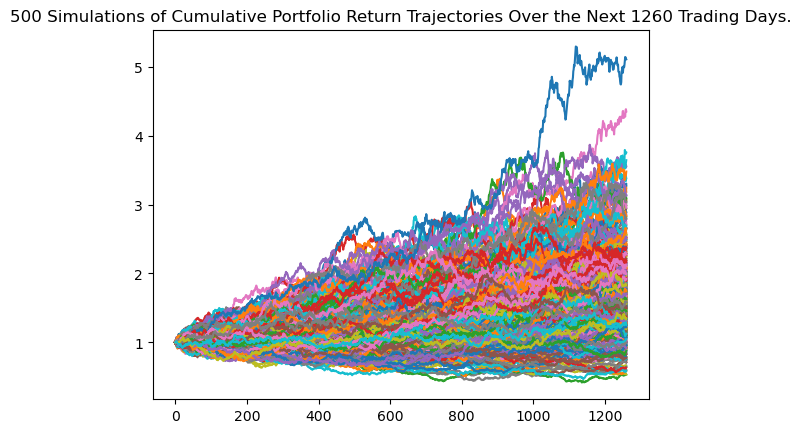

In [40]:
# Plot simulation outcomes
line_plot = MC_dist_portfolio_five.plot_simulation()

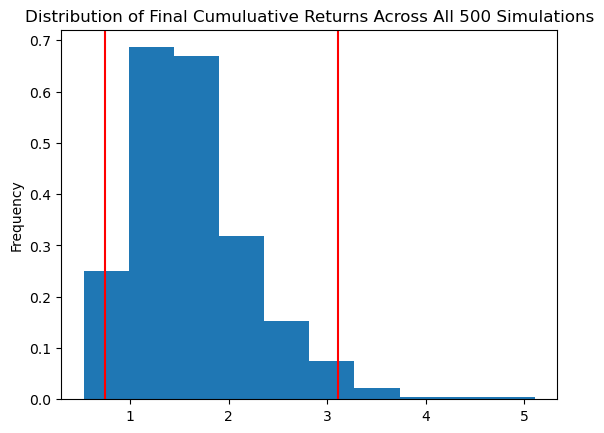

In [41]:
# Plot probability distribution and confidence intervals
dist_plot=MC_dist_portfolio_five.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_portfolio_five_stat = MC_dist_portfolio_five.summarize_cumulative_return()

# Print summary statistics
print(summary_portfolio_five_stat)

count           500.000000
mean              1.637066
std               0.613193
min               0.531590
25%               1.217694
50%               1.523032
75%               1.930222
max               5.105749
95% CI Lower      0.746833
95% CI Upper      3.111989
Name: 1260, dtype: float64


C:\Users\arun1\Bootcamp\Module 5 Challenge\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [43]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_portfolio_five_stat[8]*initial_investment,2)
ci_upper_five = round(summary_portfolio_five_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $44809.96 and $186719.31


### Ten Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Case 1: Increase stock ratio from 60% to 80%, and increase initial_investment to $60,000
MC_dist_portfolio_ten = MCSimulation(portfolio_data=df_stock_data, weights = [.2,.8],num_simulation = 500, num_trading_days = 252*10)

In [45]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_portfolio_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004540,1.001755,0.973017,0.994915,1.009169,1.000392,1.005797,0.990877,1.016842,1.007077,...,1.002527,1.001118,1.002996,1.006585,0.990217,1.012573,1.000240,1.000090,1.007908,1.001136
2,1.010681,1.024647,0.984562,1.004602,1.008980,1.013030,0.986492,0.984619,1.017363,0.990677,...,1.000937,1.002633,0.997729,1.021371,1.003908,1.016532,0.984041,1.008403,1.008118,1.010780
3,1.011373,1.020762,0.987293,1.012274,1.009162,1.006405,0.992354,0.991794,1.021746,0.989545,...,0.997494,1.001013,0.990398,1.025125,1.023734,1.024036,0.981282,0.991051,1.002706,1.014316
4,1.015878,1.036478,0.971755,1.004340,1.014471,0.985905,0.991045,1.000316,1.012605,0.999157,...,1.012623,0.990133,1.010313,1.029047,1.005549,1.018736,0.985386,1.020676,0.990390,1.005041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.742544,1.495596,0.827781,2.743468,3.531149,1.091339,1.738782,1.583623,2.139203,1.951670,...,1.084102,2.790873,2.078041,3.237179,1.597226,1.179192,3.497544,2.064059,1.527685,4.756035
2517,3.730910,1.470463,0.827371,2.795940,3.535837,1.084492,1.727510,1.568200,2.140801,1.984328,...,1.073999,2.741350,2.048519,3.161859,1.616131,1.192470,3.494916,2.069887,1.522782,4.813562
2518,3.793407,1.467515,0.825201,2.794378,3.577185,1.089019,1.727748,1.588791,2.117869,1.970322,...,1.044378,2.712032,2.047901,3.197521,1.622123,1.214166,3.472521,2.042225,1.560388,4.859880
2519,3.758219,1.459217,0.842621,2.794050,3.559416,1.096166,1.750083,1.559195,2.109174,1.989321,...,1.021449,2.714934,2.042574,3.199522,1.603708,1.220325,3.494577,2.018076,1.527665,4.776846


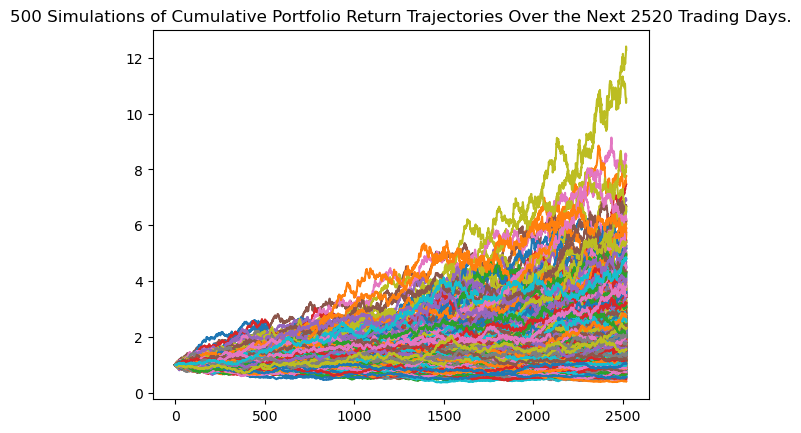

In [46]:
# Plot simulation outcomes
line_plot = MC_dist_portfolio_ten.plot_simulation()

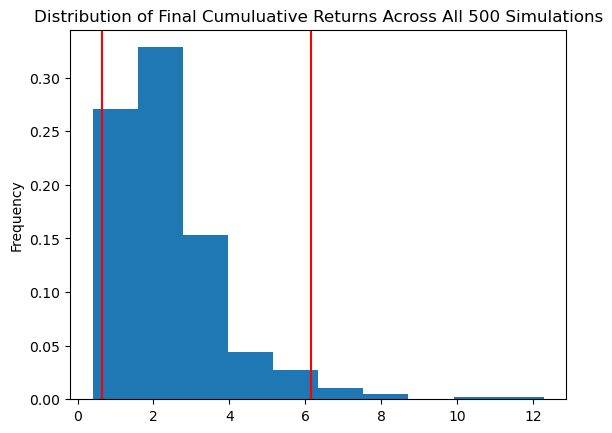

In [47]:
# Plot probability distribution and confidence intervals
dist_plot=MC_dist_portfolio_ten.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_portfolio_ten_stat = MC_dist_portfolio_ten.summarize_cumulative_return()

# Print summary statistics
print(summary_portfolio_ten_stat)

count           500.000000
mean              2.389460
std               1.447660
min               0.402390
25%               1.448578
50%               2.072750
75%               2.956451
max              12.284519
95% CI Lower      0.646988
95% CI Upper      6.147871
Name: 2520, dtype: float64


C:\Users\arun1\Bootcamp\Module 5 Challenge\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [49]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_portfolio_ten_stat[8]*initial_investment,2)
ci_upper_ten = round(summary_portfolio_ten_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $38819.28 and $368872.26
